In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
device = torch.device("cuda") if torch.cuda.is_available else "cpu"
print(f"Using {device} device")

Using cuda device


In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [5]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [6]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([8], device='cuda:0')


In [8]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


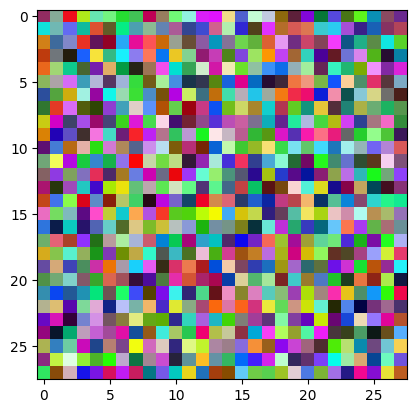

In [11]:
import matplotlib.pyplot as plt
image_np = input_image.permute(1, 2, 0).numpy()
plt.imshow(image_np)

In [13]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [14]:
layer1 = nn.Linear(in_features = 28*28, out_features = 20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [15]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-5.4738e-01, -5.0628e-01, -4.0920e-01,  2.3421e-01, -2.7284e-01,
          5.0049e-01, -3.0905e-02,  5.2640e-02,  1.4325e-02, -2.8191e-01,
          3.0676e-04,  8.8256e-02,  2.7114e-01,  3.1151e-01,  7.7565e-02,
         -3.6444e-01, -1.1852e-01, -4.9976e-01,  7.7915e-02, -4.0766e-01],
        [-5.9860e-01, -1.7773e-01, -2.8794e-01,  1.3311e-01, -4.5632e-01,
          2.9664e-01, -1.4196e-01,  1.0505e-01,  5.4015e-02, -6.4792e-01,
         -1.6688e-01, -1.0483e-01, -2.7301e-01,  1.6883e-01,  5.7600e-02,
         -1.9042e-01, -6.2422e-02, -6.8863e-01,  2.1492e-01, -3.6735e-01],
        [-5.4554e-01, -7.0568e-01, -3.4918e-01, -5.5145e-03, -1.9960e-01,
          7.2399e-01, -1.8648e-01, -4.6433e-02,  4.9892e-01, -5.1413e-01,
          4.9052e-03,  6.5848e-02, -1.9201e-01,  3.6912e-01,  1.2099e-01,
         -1.7183e-01, -9.8179e-02, -3.2937e-01,  6.1654e-02, -5.2938e-01]],
       grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 2.3

In [16]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

In [18]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [20]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Sixe: {param.size()} | Values: {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Sixe: torch.Size([512, 784]) | Values: tensor([[-0.0026, -0.0057, -0.0300,  ...,  0.0276, -0.0352,  0.0004],
        [-0.0159, -0.0246, -0.0227,  ...,  0.0014, -0.0261,  0.0202]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Sixe: torch.Size([512]) | Values: tensor([0.0282, 0.0155], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Sixe: torch.Size([512, 512]) | Values: tensor([[ 0.0196,  0.0186,  0.0310,  ...,  0.0080,  0.0327,  0.0190],
        [-0.0113,  0.0102, -0.0073,  ..., -0.0203, -0.0132,  0.0263]],
       device='cuda:0', grad_fn=<SliceBa